In [5]:
#Using the Mall Customer Segmentation dataset, apply K-means clustering to group customers based on their Annual Income and Spending Score. 
# Use the Elbow Method to find the best number of clusters and visualize the results with a scatter plot.
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import seaborn as sns

In [4]:
df = pd.read_csv('Mall_Customers.csv')
df.isnull().sum() # chcks for missing or null values
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [8]:
# size of the data (row, column)
df.shape

(200, 5)

In [9]:
# getting info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
# choosing annual income and spending score 
# index position 3 and 4 from df
x = df.iloc[:,[3,4]].values
print(x)

In [11]:
# WCSS measures the sum of squared distances between each data point and its assigned cluster centroid
# plot WCSS values for different numbers of clusters and look for an "elbow point", where the rate of decrease in WCSS slows down significantly. 
# This point represents a trade off between the number of clusters and the compactness of the clusters, helping to identify an appropriate number of clusters for the dataset.


In [12]:
# Finding WCSS values for different number of clusters
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init = 'k-means++', random_state= 42)
    kmeans.fit(x)

    wcss.append(kmeans.inertia_)

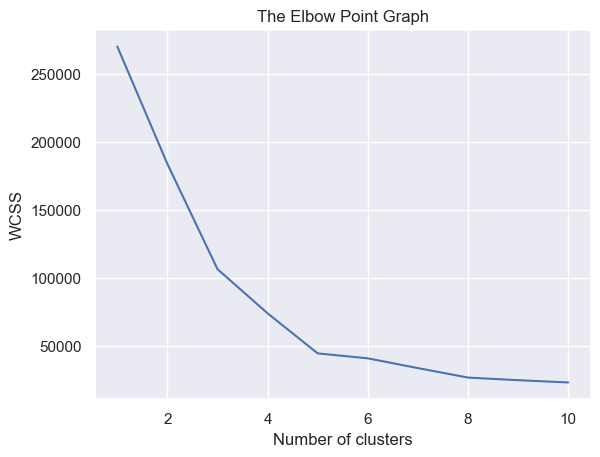

In [13]:
#plot an elbow graph
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [24]:
#training the K-Means clustering model
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans.fit(x)

clusters = kmeans.labels_



In [25]:
df['cluster'] = clusters
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),cluster
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


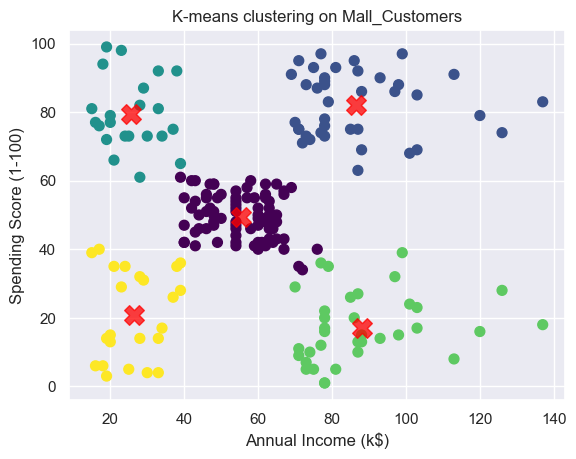

In [27]:

# data visualisation 
#using annual income and spending score for visualisatioon
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], c = df['cluster'], cmap = 'viridis', s = 50)

#mark cluster centers
centers = kmeans.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c = 'red', s=200, alpha = 0.75, marker = 'X')

#labels and title
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('K-means clustering on Mall_Customers')
plt.show()

In [28]:
# # training the Kmeans clustering model
# kmeans = KMeans(n_clusters= 5, init='k-means++', random_state=0)
# y = kmeans.fit_predict(x)
# print(y)

# #plotting all the clusters
# plt.figure(figsize=(5,5))
# plt.scatter(x[y==0,0], x[y==0,1], s=25, c='green', label= 'Cluster 1')
# plt.scatter(x[y==1,0], x[y==1,1], s=25, c='red', label= 'Cluster 2')
# plt.scatter(x[y==2,0], x[y==2,1], s=25, c='yellow', label= 'Cluster 3')
# plt.scatter(x[y==3,0], x[y==3,1], s=25, c='indigo', label= 'Cluster 4')
# plt.scatter(x[y==4,0], x[y==4,1], s=25, c='blue', label= 'Cluster 5')

# #plot centroids
# plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=50, c='black', label= 'Centroids')
# plt.title('Customer Groups')
# plt.xlabel('Annual Income')
# plt.ylabel('Spending Score')
# plt.show()


<Axes: xlabel='Annual Income (k$)', ylabel='count'>

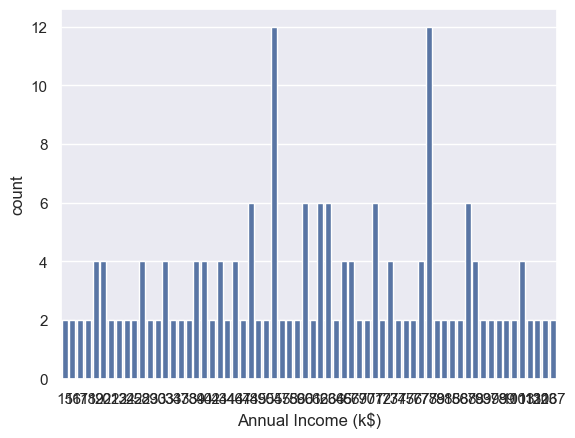

In [30]:
sns.countplot(data=df, x='Annual Income (k$)')

<Axes: xlabel='Spending Score (1-100)', ylabel='count'>

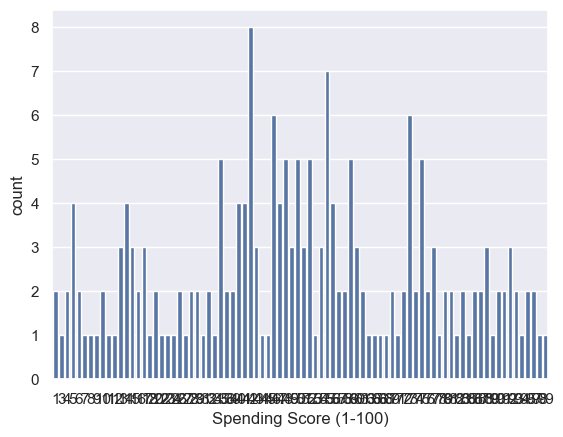

In [32]:
sns.countplot(data = df, x='Spending Score (1-100)')

In [33]:
df.corr()

ValueError: could not convert string to float: 'Male'

In [34]:
numlist = [i for i in range(11)]
print(numlist)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]


In [38]:
numlist = [i for i in range(0,11,2)]
print(numlist)

[0, 2, 4, 6, 8, 10]


In [39]:
numlist = [i for i in range(1,10,2)]
print(numlist)

[1, 3, 5, 7, 9]


In [40]:
numlist = [i for i in range(11) if i %2 ==0]
print(numlist)

[0, 2, 4, 6, 8, 10]
